In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Complete EDA of *train* excel sheet

In [2]:
train = pd.read_csv(r"C:\Users\ariha\Desktop\Hackathons & Projects\Wipro Hackathon\train.csv")
train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [3]:
train.shape

(175296, 18)

In [4]:
train['Date'] = pd.to_datetime(train[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [5]:
y = pd.DataFrame(train[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']])
y.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [6]:
y.shape

(175296, 3)

In [7]:
x = train.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
x.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Date
0,2009,1,1,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00
1,2009,1,1,0,30,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00
2,2009,1,1,1,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00
3,2009,1,1,1,30,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00
4,2009,1,1,2,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00


In [8]:
x.shape

(175296, 16)

In [9]:
x.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)
x.head()

,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Date
0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00
1,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00
2,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00
3,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00
4,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00


In [10]:
x.shape

(175296, 11)

In [11]:
columns_list = []
for cols in x.columns:
    columns_list.append(cols)
columns_list

['Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Fill Flag',
 'Date']

In [12]:
columns_list.pop()
columns_list.insert(0, 'Date')
columns_list

['Date',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Fill Flag']

In [13]:
x = x[columns_list]
x.head()

,Date,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009-01-01 00:00:00,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009-01-01 00:30:00,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009-01-01 01:00:00,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009-01-01 01:30:00,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009-01-01 02:00:00,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [14]:
corr_matrix = x.corr()
corr_matrix

,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Cloud Type,1.000000,0.202096,0.066777,-0.137158,0.235374,0.026873,0.326904,-0.081565,0.072632,0.090161
Dew Point,0.202096,1.000000,0.848948,-0.419534,0.193455,-0.222336,0.881881,-0.076357,-0.140699,0.036851
Temperature,0.066777,0.848948,1.000000,-0.371395,-0.341914,-0.526548,0.742449,-0.066673,-0.046694,0.015734
Pressure,-0.137158,-0.419534,-0.371395,1.000000,-0.085004,0.078900,-0.365342,-0.182006,-0.122674,0.052521
Relative Humidity,0.235374,0.193455,-0.341914,-0.085004,1.000000,0.607108,0.182658,-0.019108,-0.172248,0.023674
Solar Zenith Angle,0.026873,-0.222336,-0.526548,0.078900,0.607108,1.000000,-0.182529,0.003802,-0.295927,-0.029150
Precipitable Water,0.326904,0.881881,0.742449,-0.365342,0.182658,-0.182529,1.000000,-0.105735,-0.106892,0.044106
Wind Direction,-0.081565,-0.076357,-0.066673,-0.182006,-0.019108,0.003802,-0.105735,1.000000,0.035634,-0.017124
Wind Speed,0.072632,-0.140699,-0.046694,-0.122674,-0.172248,-0.295927,-0.106892,0.035634,1.000000,0.000447
Fill Flag,0.090161,0.036851,0.015734,0.052521,0.023674,-0.029150,0.044106,-0.017124,0.000447,1.000000


In [15]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

C:\Users\ariha\AppData\Local\Temp/ipykernel_10000/2621372733.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Cloud Type,NaN,0.202096,0.066777,-0.137158,0.235374,0.026873,0.326904,-0.081565,0.072632,0.090161
Dew Point,NaN,NaN,0.848948,-0.419534,0.193455,-0.222336,0.881881,-0.076357,-0.140699,0.036851
Temperature,NaN,NaN,NaN,-0.371395,-0.341914,-0.526548,0.742449,-0.066673,-0.046694,0.015734
Pressure,NaN,NaN,NaN,NaN,-0.085004,0.078900,-0.365342,-0.182006,-0.122674,0.052521
Relative Humidity,NaN,NaN,NaN,NaN,NaN,0.607108,0.182658,-0.019108,-0.172248,0.023674
Solar Zenith Angle,NaN,NaN,NaN,NaN,NaN,NaN,-0.182529,0.003802,-0.295927,-0.029150
Precipitable Water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.105735,-0.106892,0.044106
Wind Direction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035634,-0.017124
Wind Speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000447
Fill Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
columns_to_drop = []
for cols in upper.columns:
    if any (upper[cols] > 0.75):
        columns_to_drop.append(cols)
columns_to_drop

['Temperature', 'Precipitable Water']

In [17]:
x.drop(columns_to_drop, axis=1, inplace=True)
x.head()

,Date,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
0,2009-01-01 00:00:00,0,0.0,1010,75.34,106.15,346.1,3.1,0
1,2009-01-01 00:30:00,0,1.0,1010,80.81,112.28,346.1,3.1,0
2,2009-01-01 01:00:00,4,0.0,1010,78.27,118.50,347.9,3.2,0
3,2009-01-01 01:30:00,4,0.0,1010,78.27,124.78,347.9,3.1,0
4,2009-01-01 02:00:00,4,0.0,1010,76.45,131.12,350.0,3.0,0


In [18]:
x.shape

(175296, 9)

In [19]:
y.shape

(175296, 3)

In [20]:
x.iloc[:1, 1:]

,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
0,0,0.0,1010,75.34,106.15,346.1,3.1,0


In [21]:
columns_list

['Date',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Fill Flag']

In [22]:
columns_list.remove('Date')
columns_list.remove('Temperature')
columns_list.remove('Precipitable Water')

In [23]:
columns_list

['Cloud Type',
 'Dew Point',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Wind Direction',
 'Wind Speed',
 'Fill Flag']

In [24]:
x.head()

,Date,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
0,2009-01-01 00:00:00,0,0.0,1010,75.34,106.15,346.1,3.1,0
1,2009-01-01 00:30:00,0,1.0,1010,80.81,112.28,346.1,3.1,0
2,2009-01-01 01:00:00,4,0.0,1010,78.27,118.50,347.9,3.2,0
3,2009-01-01 01:30:00,4,0.0,1010,78.27,124.78,347.9,3.1,0
4,2009-01-01 02:00:00,4,0.0,1010,76.45,131.12,350.0,3.0,0


In [25]:
# Scaling dataframes x & y to (0, 1)
scaler_x = MinMaxScaler((0, 1))
scaler_y = MinMaxScaler((0, 1))
x = pd.DataFrame(scaler_x.fit_transform(x.iloc[:, 1:]), columns=columns_list)
y = pd.DataFrame(scaler_y.fit_transform(y), columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'])

In [26]:
x.head()

,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
0,0.0,0.387244,0.740741,0.734296,0.598773,0.961389,0.240310,0.0
1,0.0,0.410023,0.740741,0.793233,0.636380,0.961389,0.240310,0.0
2,0.4,0.387244,0.740741,0.765866,0.674540,0.966389,0.248062,0.0
3,0.4,0.387244,0.740741,0.765866,0.713067,0.966389,0.240310,0.0
4,0.4,0.387244,0.740741,0.746256,0.751963,0.972222,0.232558,0.0


In [27]:
x.shape

(175296, 8)

In [28]:
y.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [29]:
y.shape

(175296, 3)

In [30]:
x_train = pd.DataFrame(x.iloc[:int(len(x) * 0.90), :])
x_train.head()

,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
0,0.0,0.387244,0.740741,0.734296,0.598773,0.961389,0.240310,0.0
1,0.0,0.410023,0.740741,0.793233,0.636380,0.961389,0.240310,0.0
2,0.4,0.387244,0.740741,0.765866,0.674540,0.966389,0.248062,0.0
3,0.4,0.387244,0.740741,0.765866,0.713067,0.966389,0.240310,0.0
4,0.4,0.387244,0.740741,0.746256,0.751963,0.972222,0.232558,0.0


In [31]:
x_train.shape

(157766, 8)

In [32]:
y_train = pd.DataFrame(y.iloc[:int(len(y) * 0.90), :])
y_train.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [33]:
y_train.shape

(157766, 3)

In [34]:
x_val = pd.DataFrame(x.iloc[int(len(x) * 0.90):, :])
x_val.head()

,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
157766,0.4,0.410023,0.740741,0.635492,0.304785,0.919722,0.155039,0.00
157767,0.1,0.410023,0.740741,0.686348,0.321779,0.919722,0.162791,0.00
157768,0.1,0.410023,0.740741,0.713501,0.342945,0.909722,0.178295,0.00
157769,0.2,0.410023,0.740741,0.770499,0.367607,0.909722,0.186047,0.04
157770,0.0,0.410023,0.740741,0.792048,0.395276,0.925000,0.193798,0.00


In [35]:
x_val.shape

(17530, 8)

In [36]:
y_val = pd.DataFrame(y.iloc[int(len(y) * 0.90):, :])
y_val.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
157766,0.267257,0.646154,0.475071
157767,0.254867,0.617308,0.428975
157768,0.251327,0.553846,0.366886
157769,0.226549,0.498077,0.299153
157770,0.200000,0.400962,0.222013


In [37]:
y_val.shape

(17530, 3)

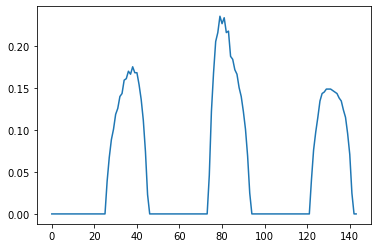

In [38]:
plt.plot(y_train.iloc[0:144, 0])

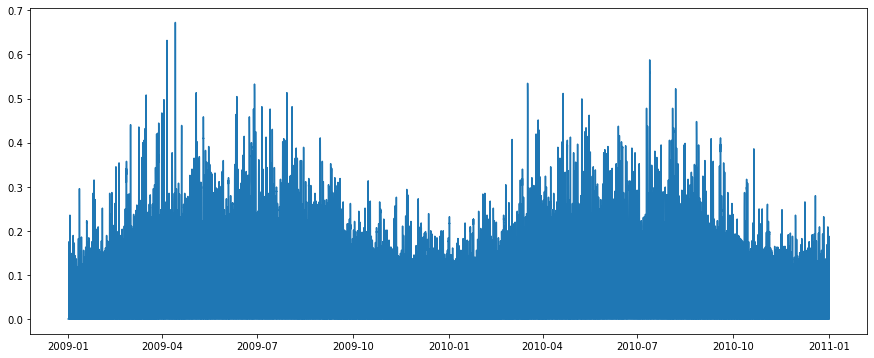

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(train['Date'][0:35040], y_train['Clearsky DHI'][0:35040])

In [40]:
# This means there is dual seasonality in the data: The values go up and back to 0 once per day and 
# the highest value of each day changes according to the time of year

# EDA of *test* excel sheet

In [41]:
test = pd.read_csv(r"C:\Users\ariha\Desktop\Hackathons & Projects\Wipro Hackathon\test.csv")
test

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,0,5.6,11.1,1006,68.64,77.89,0.8,276,2.2,0,NaN,NaN,NaN
17516,2019,12,31,22,0,0,5.7,9.3,1006,78.31,83.06,0.8,274,1.7,0,NaN,NaN,NaN
17517,2019,12,31,22,30,0,5.7,8.5,1006,82.64,88.34,0.8,273,1.8,0,NaN,NaN,NaN
17518,2019,12,31,23,0,0,4.8,7.8,1006,81.49,94.37,0.8,272,1.8,0,NaN,NaN,NaN


In [42]:
x_train

,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
0,0.0,0.387244,0.740741,0.734296,0.598773,0.961389,0.240310,0.0
1,0.0,0.410023,0.740741,0.793233,0.636380,0.961389,0.240310,0.0
2,0.4,0.387244,0.740741,0.765866,0.674540,0.966389,0.248062,0.0
3,0.4,0.387244,0.740741,0.765866,0.713067,0.966389,0.240310,0.0
4,0.4,0.387244,0.740741,0.746256,0.751963,0.972222,0.232558,0.0
...,...,...,...,...,...,...,...,...
157761,0.2,0.387244,0.740741,0.587544,0.299018,0.945556,0.162791,0.0
157762,0.2,0.387244,0.740741,0.621269,0.289018,0.931667,0.155039,0.0
157763,0.2,0.387244,0.740741,0.620946,0.284540,0.931667,0.147287,0.0
157764,0.2,0.387244,0.740741,0.608232,0.285706,0.934444,0.147287,0.0


In [43]:
x_test = test.iloc[:, 5:15]
x_test

,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0
1,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0
2,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0
3,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0
4,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0
...,...,...,...,...,...,...,...,...,...,...
17515,0,5.6,11.1,1006,68.64,77.89,0.8,276,2.2,0
17516,0,5.7,9.3,1006,78.31,83.06,0.8,274,1.7,0
17517,0,5.7,8.5,1006,82.64,88.34,0.8,273,1.8,0
17518,0,4.8,7.8,1006,81.49,94.37,0.8,272,1.8,0


In [44]:
x_test.drop(columns=['Temperature', 'Precipitable Water'], axis=1, inplace=True)
x_test

,Cloud Type,Dew Point,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Fill Flag
0,7,18.4,1008,97.70,106.23,190,2.3,0
1,3,18.4,1008,98.92,112.36,187,2.5,0
2,3,18.2,1008,98.35,118.58,184,2.8,0
3,3,18.2,1008,99.58,124.86,185,3.0,0
4,0,18.0,1008,99.71,131.20,186,3.1,0
...,...,...,...,...,...,...,...,...
17515,0,5.6,1006,68.64,77.89,276,2.2,0
17516,0,5.7,1006,78.31,83.06,274,1.7,0
17517,0,5.7,1006,82.64,88.34,273,1.8,0
17518,0,4.8,1006,81.49,94.37,272,1.8,0


In [45]:
x_test = scaler_x.fit_transform(x_test)
x_test

array([[0.77777778, 0.7877907 , 0.57142857, ..., 0.52777778, 0.27160494,
        0.        ],
       [0.33333333, 0.7877907 , 0.57142857, ..., 0.51944444, 0.2962963 ,
        0.        ],
       [0.33333333, 0.78197674, 0.57142857, ..., 0.51111111, 0.33333333,
        0.        ],
       ...,
       [0.        , 0.41860465, 0.51428571, ..., 0.75833333, 0.20987654,
        0.        ],
       [0.        , 0.39244186, 0.51428571, ..., 0.75555556, 0.20987654,
        0.        ],
       [0.        , 0.39244186, 0.51428571, ..., 0.75555556, 0.20987654,
        0.        ]])

In [54]:
x_train.shape

(157766, 8)

In [55]:
x_val.shape

(17530, 8)

In [56]:
x_test.shape

(17520, 8)

In [57]:
y_train.shape

(157766, 3)

In [58]:
y_val.shape

(17530, 3)